# Basses Températures

## Introduction

Les panneaux solaires basses températures sont regroupés en trois catégories majeures, fonction de leur technologie et de la température atteignable en sortie. 

Il y a aujourd'hui trois technologies "mainstream":

```{sidebar} La plus simple
Des tubes noirs, sans protection, au soleil. Utilisé dans les piscines
```

![Piscine](../images/piscine.PNG)

```{sidebar} 2. Collecteurs plans
Une vitre protégeant un absorbeur noir, derrière lequel passe un tuyau dans lequel cricule le fluide caloporteur. La vitre bloque les pertes et permet une meilleure montée en température.
```

![FlatPlate](../images/flatPlate.PNG)

```{sidebar} 3. ETC 
ETC, evacuated tube collectors: des tubes en verre dans lesquels un absorbeur noir récupère la chaleur. Il y a soit un caloduc, soit une circulation direct du fluide caloporteur. Les tubes étant sous vide, les pertes par convection sont minimisées.
```

![ETC](../images/ETC.PNG)

Le fluide caloporteur est le plus souvent de l'eau. Sous nos latitudes, on mélange l'eau avec du glycol afin d'éviter que cette dernière ne gèle la nuit en hiver. Il est donc nécessaire d'installer un échangeur entre le stockage et le panneau solaire.

L'énergie incidente sur le collecteur est caractérisé par les propriétés optiques du système: le verre laisse passer une certaine portion du rayonnement; de même, l'absorbeur n'absorbe pas tout le rayonnement. 

### Efficacité optique

```{sidebar} **L'intérêt du verre**
Le verre laisse passer en grande partie l'énergie solaire, mais bloque les rayonnements infrarouges, c'est-à-dire ceux émis à basse température. Il diminue également grandement les pertes par convection!
```

L'efficacité optique est défini comme la proportion d'énergie solaire arrivant jusqu'à l'absorbeur. Dans le cadre des capteurs plans, la lumière traverse une surface: la protection en verre, transparente aux rayons solaires, a un indice de transparence $\tau$ varie en fonction du verre et de sa propreté; il est en général de l'ordre de 0.9.

L'absorbeur, souvent un métal noir, a généralement une absorption de 0.9 également. 

On écrit souvent l'efficacité optique comme $\eta_0$ ou $\eta_{opt}$. La puissance en entrée du capteur s'écrit alors $P_{entrée} = \eta_0 * G * A_{panneau}$ avec $P_{entrée}$ en W, G l'irradiation totale en W/m² et $A_{panneau}$ l'aire du panneau en m².

![Schéma Panneau Plan](../images/schémaPanneau.PNG)

### Pertes thermiques 

Les transferts thermiques se font de trois manières: rayonnement, conduction et convection. Il est donc intéressant de travailler à réduire les pertes par les trois modes de transfert de la chaleur.

1. Conduction: l'arrière des panneaux est isolé.
2. Rayonnement: le verre possède est réflectif dans les infrarouges lointains, ce qui correspond aux émissions basse température.
3. Convection: l'air permet un transfert de chaleur, néanmoins son non-renouvellement permet une montée en température (effet de serre). Sous vide, le transfert est encore plus faible.

Chacun des termes a une expression classique; les pertes par conduction et convection sont proportionelles à $T-T_{amb}$, celles par rayonnement à $T^4-T_{amb}^4$. Sur une petite plage de calculs, il est possible d'écrire cela $(T^2-T_{amb}^2)*(T^2+T_{amb}^2)$ et de considérer le deuxième terme constant. Des normes ont donc été mises en place pour le calcul des pertes thermiques.

#### Modélisation habituelle

Les pertes thermiques des collecteurs sont déterminés expérimentalement par les constructeurs. Ces pertes, en Watt par m² de collecteur, s'écrivent:

$$ 
P_{pertes} = a_1 \times (\bar{T}-T_{amb})+a_2 \times (\bar{T}-T_{amb})^2 
$$

Avec $\bar{T}=\frac{T_{inlet}+T_{outlet}}{2}$ la température moyenne dans le panneau. $a_1$ et $a_2$ sont déterminés expérimentalement. 

$\bar{T}$: ceci est la moyenne dans le panneau. Définie de manière classique, càd: $\bar{T}=\frac{1}{L} \times \int_0^{L} T(z)dz$, il peut être intéressant de se demander si cette dernière est vraiment égale à la moyenne de la température d'entrée et de sortie. Cela est "très" vraie si la température dans le panneau est linéaire, ce qui est le cas selon la plage de fonctionnement.

### Efficacité du panneau & Bilan Thermique

La puissance utile récupérée par le panneau s'écrit:

$$
P_u = \dot{m} \times C_p \times (T_{sortie}-T_{entrée}) = (P_{in}-P_{pertes}) \times A_{panneau}
$$

Avec $\dot{m}$ le débit dans le panneau solaire en kg/s, $C_p$ la capacité calorifique du fluide caloporteur en J/kg.K, $P_{in}$ la puissance en entrée du collecteur en W/m², $P_{pertes}$ les pertes en W/m² du panneau, $P_u$ la puissance utile récupérée par le panneau.

**Efficacité totale du panneau**:

L'efficacité du système se définit comme le rapport de la puissance utile sur l'énergie solaire incidente: $\eta = \frac{P_u}{G*A_{panneau}} = \eta_{opt}-a_1 * \frac{\bar{T}-T_{amb}}{G}-a_2*\frac{(\bar{T}-T_{amb})^2}{G}$

Les données des courbes suivantes sont tirées d'[ici](https://www.researchgate.net/publication/331178549_Comparison_of_the_Energy_Performance_between_Flat-plate_and_Heat_Pipe_Evacuated_Tube_Collectors_for_Solar_Water_Heating_Systems_under_Mediterranean_Climate_Conditions/figures?lo=1).

In [2]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=False)
init_notebook_mode(connected=False)

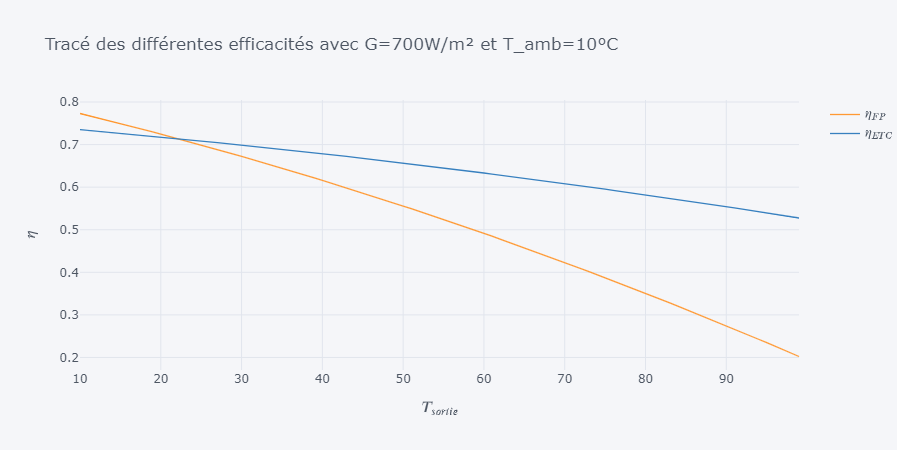

In [16]:
eta0_FP = 0.773
a1_FP = 3.243
a2_FP = 0.014
eta0_ETC = 0.735
a1_ETC = 1.16
a2_ETC = 0.0053
Tamb=10
G=700
def eta(eta0,a1,a2):
    return lambda x : eta0-a1*(x-Tamb)/G-a2*(x-Tamb)**2/G
eta_FP = eta(eta0_FP,a1_FP,a2_FP)
eta_ETC = eta(eta0_ETC,a1_ETC,a2_ETC)
x = [k for k in range(Tamb,100)]
eta1 = [eta_FP(k) for k in range(Tamb,100)]
eta2 = [eta_ETC(k) for k in range(Tamb,100)]
df = pd.DataFrame(data=[x,eta1,eta2]).T
df.columns=['$\frac{T-T_{amb}}{G}$','$\eta_{FP}$','$\eta_{ETC}$']
df.iplot(x='$\frac{T-T_{amb}}{G}$',y=['$\eta_{FP}$','$\eta_{ETC}$'], 
         title="Tracé des différentes efficacités avec G=700W/m² et T_amb=10°C", xTitle='$T_{sortie}$', yTitle = '$\eta$')

## Stockage et système 

Une installation solaire active est généralement constituée de panneaux solaires, d'un ballon de stockage, d'un chauffage d'appoint et d'une pompe. 

Dans une maison française post-nucléarisation, le chauffe-eau est souvent électrique. 

Certains tarifs d'EDF rémunèrent l'utilisation d'Heures Creuses, afin de lisser la demande électrique sur le réseau. Par conséquent, un nombre certain de chauffe-eau s'allument à 22H, ainsi que d'autres appareils électroménagers comme les machines. Ce qui donne les courbes de demande électrique suivante:

### Thermosiphon

### Exercices

1. Exprimer la température de sortie en fonction des autres variables.
2. Avec les paramètres suivants: $\eta_{opt}=0.8, \ a_1 = 3.01 W/m².K , \ a_2=0.2 W/m².K²$ et en choisissant des valeurs plausibles pour les autres paramètres

Il faut résoudre l'équation de degré 2. Les résultats sont:

$$
T_{out} = 
$$

Calculer la température du stockage au cours d'une journée avec l'irradiance définie comme ci-dessous pour le panneau de l'exercice précédent, en utilisant les valeurs de $\dot{m}_{demande}$ présentes dans les photos du livre ainsi que celle de $T_{reseau}$.

In [17]:
import sympy
import math
sympy.init_printing()
x = sympy.Symbol('x')

In [24]:
polynomial = 10*x**4+5*x+10
polynomial.expand()

In [26]:
sols=sympy.solve(polynomial)

In [31]:
sols[1].evalf()

In [14]:
x = sympy.Symbol("x")

In [16]:
sympy.roots(x**2+x+1)

{-1/2 - sqrt(3)*I/2: 1, -1/2 + sqrt(3)*I/2: 1}